![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# регулярные выражения:        
import re

# модули для работы с временными значениями:
from datetime import datetime, timedelta

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [8]:
df_test.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
9844,id_9844,Stockholm,"['Bar', 'Pub']",471.0,$$ - $$$,63.0,"[['English style pub', 'Good local feel with n...",/Restaurant_Review-g189852-d5949258-Reviews-Ol...,d5949258
2755,id_2755,Berlin,"['American', 'Fast Food', 'Vegetarian Friendly...",411.0,$,182.0,"[['Good burgers', 'Juicy - Tasty - Varied'], [...",/Restaurant_Review-g187323-d6610795-Reviews-Sc...,d6610795
5650,id_5650,London,NaN,12848.0,NaN,3.0,"[['Convenient for a quick breakfast', 'Needs a...",/Restaurant_Review-g186338-d12227839-Reviews-C...,d12227839
3637,id_3637,Paris,['French'],12377.0,$$ - $$$,35.0,"[['Decent breakfast buffet', 'Boring food'], [...",/Restaurant_Review-g187147-d2569359-Reviews-Co...,d2569359
3485,id_3485,Paris,"['French', 'European', 'Gastropub', 'Vegetaria...",751.0,$$ - $$$,371.0,"[['Fantastic authentic French cuisine', 'Perfe...",/Restaurant_Review-g187147-d4178408-Reviews-Le...,d4178408


In [9]:
sample_submission.sample(5)

,Restaurant_id,Rating
8110,id_8110,3.5
7553,id_7553,1.0
3473,id_3473,1.0
6948,id_6948,3.0
1152,id_1152,4.0


In [10]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [12]:
df.sample(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
38000,id_1636,Barcelona,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",1637.0,$$ - $$$,50.0,"[['Amazing food', 'Fantastic lunch'], ['10/19/...",/Restaurant_Review-g187497-d10758724-Reviews-M...,d10758724,1,4.5
3886,id_3886,Barcelona,"['Mediterranean', 'Spanish']",6342.0,$,23.0,"[['Long-time, family-owned, low-frills, local....",/Restaurant_Review-g187497-d3676721-Reviews-Jo...,d3676721,0,0.0
41552,id_6122,Milan,['Italian'],6126.0,$,49.0,[['OK pizzas + bad service + terribly overpri....,/Restaurant_Review-g187849-d8338665-Reviews-Sp...,d8338665,1,2.0
48869,id_3181,Rome,"['Italian', 'Pizza', 'Seafood', 'Mediterranean']",3182.0,$$ - $$$,47.0,"[['Dinner', 'Highly recommended!'], ['04/21/20...",/Restaurant_Review-g187791-d10028870-Reviews-L...,d10028870,1,4.0
46294,id_7548,London,"['Lebanese', 'Fast Food', 'Middle Eastern', 'M...",7557.0,$,80.0,"[['Great Shawarma', 'Shawarma!'], ['09/15/2017...",/Restaurant_Review-g186338-d720385-Reviews-Ran...,d720385,1,4.0
27765,id_369,Ljubljana,NaN,370.0,NaN,NaN,"[['Quick'], ['03/11/2014']]",/Restaurant_Review-g274873-d783229-Reviews-Hal...,d783229,1,4.0
44068,id_451,Madrid,"['Peruvian', 'South American', 'Gluten Free Op...",452.0,$$ - $$$,121.0,"[['Authentic Peruvian food', 'From Peru with l...",/Restaurant_Review-g187514-d8358683-Reviews-Pa...,d8358683,1,4.5
4990,id_4990,Milan,['Italian'],3501.0,$,15.0,"[['Ok lunch - good salat', 'when open ??'], ['...",/Restaurant_Review-g187849-d7210059-Reviews-Fe...,d7210059,0,0.0
31153,id_13133,London,['Indian'],13143.0,NaN,5.0,"[['Great place, great food, great people', 'Mu...",/Restaurant_Review-g186338-d4041685-Reviews-Sh...,d4041685,1,4.0
24348,id_7486,London,['New Zealand'],7495.0,$,11.0,"[['Great coffee. pleasant place,interesting m....",/Restaurant_Review-g186338-d8722473-Reviews-Ki...,d8722473,1,4.5


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
df.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   

In [14]:
# заполняем пропуски 0 в числовом признаке Number of Reviews (обработка пропусков в категориальных признаках будет позже):
df['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [15]:
df.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [16]:
# По One-Hot Encoding создаем новые признаки городов (пока в отдельном df):
df_cities = pd.get_dummies(df['City'])

#### Возьмем следующий признак "Price Range".

In [17]:
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
df['Price'] = df['Price Range'].map(price_dict)
df['Price']

0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
49995    2.0
49996    2.0
49997    NaN
49998    2.0
49999    2.0
Name: Price, Length: 50000, dtype: float64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [18]:
# Пропуски заполняем медианным значением
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Price'].value_counts()

2.0    40402
1.0     7816
3.0     1782
Name: Price, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

### Cuisine Style

In [19]:
# Рассмотрим признак Cuisine Style на частоту встречаемых видов кухон в ресторанах:
df_copy = df.copy()
df_copy['Cuisine Style'] = df_copy['Cuisine Style'].fillna('0,0')
df_copy['Cuisine Style'] = df_copy['Cuisine Style'].apply(lambda x: eval(x))
df_copy = df_copy.explode('Cuisine Style')
df_copy['Cuisine Style'].value_counts()

0                      23180
Vegetarian Friendly    14021
European               12561
Mediterranean           7820
Italian                 7433
                       ...  
Yunnan                     2
Xinjiang                   1
Latvian                    1
Salvadoran                 1
Burmese                    1
Name: Cuisine Style, Length: 126, dtype: int64

In [20]:
df_copy['Cuisine Style'].value_counts()[:20]

0                      23180
Vegetarian Friendly    14021
European               12561
Mediterranean           7820
Italian                 7433
Vegan Options           5684
Gluten Free Options     5185
Bar                     4094
French                  3970
Asian                   3786
Pizza                   3502
Spanish                 3456
Pub                     3058
Cafe                    2883
Fast Food               2122
British                 1992
International           1966
Seafood                 1878
Japanese                1860
Central European        1727
Name: Cuisine Style, dtype: int64

In [21]:
df_copy['Cuisine Style'].value_counts().nunique()

106

In [22]:
df['Cuisine Style'] = df['Cuisine Style'].fillna(0)

In [23]:
# Зададим списки ID ресторанов для 2 самых часто встречаемых видов кухон:
Restaurant_id_Vegetarian_Friendly = list(df[df['Cuisine Style'].str.contains('Vegetarian Friendly', na=False)]['Restaurant_id'])
Restaurant_id_European = list(df[df['Cuisine Style'].str.contains('European', na=False)]['Restaurant_id'])

# и создадим для них два булевых новых признака:
df['Cusines_Vegetarian_Friendly'] = df['Restaurant_id'].apply(lambda x: 1 if x in Restaurant_id_Vegetarian_Friendly else 0)
df['Cusines_European'] = df['Restaurant_id'].apply(lambda x: 1 if x in Restaurant_id_European else 0)

### Feature engineering

In [24]:
# Анализируем, что можно выделить из Reviews:
df['Reviews'].value_counts()

[[], []]                                                                                                         8112
[['Enjoyable restaurant with indoor and outdo...', 'Delicious food'], ['11/04/2017', '10/31/2017']]                 2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]                      2
[['Great Asian Option', 'Wow'], ['10/16/2017', '09/07/2016']]                                                       2
[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]       2
                                                                                                                 ... 
[['Good staff and food', 'Must visit!'], ['11/12/2017', '11/08/2017']]                                              1
[['Great steak, good service, good value-for...', 'First evening in Porto'], ['09/23/2017', '09/26/2017']]          1
[['Good fado music', 'Excellent Traditional Portuguese F

In [25]:
# добавим признак с идентефикацией ресторанов без отзывов на сайте:
df['Reviews_value']= df['Reviews'].replace('[[], []]', 0)
df['Reviews_value']=df['Reviews_value'].apply(lambda x: 1 if x!=0 else x)
df['Reviews_value'].value_counts()

1    41888
0     8112
Name: Reviews_value, dtype: int64

In [26]:
# с помощью библиотеки Re выделим даты из столбца Reviews:
df['Reviews_date'] = df['Reviews'].apply(lambda x: re.findall(r"\d\d\/\d\d\/\d{4}", str(x)) 
                                                           if len(re.findall(r"\d\d\/\d\d\/\d{4}", str(x))) == 2
                                                           else ['01/01/2000', '01/01/2000'])

In [27]:
# признак по разнице минут между двумя отзывами из столбца Reviews:
df['Reviews_delta'] = df['Reviews_date'].apply(lambda x: (datetime.timestamp(datetime.strptime(x[0], '%m/%d/%Y')) - datetime.timestamp(datetime.strptime(x[1], '%m/%d/%Y')))/60)
df['Reviews_delta']

0              0.0
1          53280.0
2          31680.0
3          20160.0
4          21600.0
           ...    
49995      48960.0
49996      12960.0
49997    4502880.0
49998      33120.0
49999    1880640.0
Name: Reviews_delta, Length: 50000, dtype: float64

In [28]:
# Изменим значения из ID_TA со строковых на числовые:
df['ID_TA'] = df['ID_TA'].apply(lambda x: int(x[1:]))
df['ID_TA'].value_counts()

2477531     2
11921719    2
3161682     2
793170      2
5617412     2
           ..
10396257    1
6845353     1
5263967     1
7291485     1
720896      1
Name: ID_TA, Length: 49963, dtype: int64

In [29]:
# создадим признак вероятного дубликата по одиннаковым ID:
Repeart_ID = df['ID_TA'].value_counts()
df['Probable_duplicates'] = df['ID_TA'].apply(lambda x: Repeart_ID[x] - 1)
df['Probable_duplicates'].value_counts()

0    49926
1       74
Name: Probable_duplicates, dtype: int64

In [30]:
df['ID_TA'].max()

13507346

In [31]:
df['ID_TA'].min()

680315

In [32]:
# получим признак ID, разделенный на группы по номерам ID, кратным 500000):
df['Group_ID_TA'] = df['ID_TA'].apply(lambda x: x // 500000)
df['Group_ID_TA'].value_counts()

1     4044
2     3724
4     3075
14    2639
11    2546
20    2519
7     2425
24    2424
25    2416
17    2166
16    2142
23    2089
8     1940
9     1920
15    1801
13    1768
3     1754
21    1578
6     1530
19    1328
10    1110
5     1102
26     898
12     835
22     122
18     101
27       4
Name: Group_ID_TA, dtype: int64

In [33]:
# добавим новый признак, возвращающий для каждого ресторана количество ресторанов из его города в датасете:
Cities = df.City.value_counts()
df['City_value'] = df['City'].apply(lambda x: Cities[x])
df['City_value']

0        6108
1         475
2         745
3        7193
4         380
         ... 
49995    2694
49996    6108
49997    1033
49998     925
49999    2694
Name: City_value, Length: 50000, dtype: int64

In [34]:
# получим важный признак отношения Ranking ресторана к количеству ресторанов из его города в датасете (чем меньше результат, тем, вероятно, ресторан лучше) 
df['Rate_ranking_in_City'] = df['Ranking'] / df['City_value']
df['Rate_ranking_in_City'].value_counts()

1.000000    16
2.000000    14
0.500000     9
1.333333     6
1.500000     6
            ..
0.637425     1
2.013423     1
2.112609     1
0.991159     1
1.736823     1
Name: Rate_ranking_in_City, Length: 49655, dtype: int64

In [35]:
# Признак среднего уровня цены по городу ресторана:
dict_avg_price_for_city = df.groupby('City')['Price'].mean().to_dict()
df['Average_price_for_city'] = df['City'].map(dict_avg_price_for_city)
df['Average_price_for_city'].value_counts()

1.861949    7193
1.926981    6108
1.916077    3813
1.856259    3395
1.862477    2705
1.845583    2694
1.788722    2589
1.840308    1816
1.822101    1647
1.914761    1443
1.871720    1372
1.907915    1314
1.940135    1186
1.944105    1145
1.944938    1126
1.969022    1033
1.807052    1021
1.886486     925
1.839713     836
1.934066     819
1.798969     776
1.766443     745
1.981022     685
1.772586     642
2.033898     590
1.763538     554
1.959016     488
1.911579     475
1.936842     380
1.984791     263
1.819820     222
Name: Average_price_for_city, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
Restaurant_id                  50000 non-null object
City                           50000 non-null object
Cuisine Style                  50000 non-null object
Ranking                        50000 non-null float64
Price Range                    32639 non-null object
Number of Reviews              50000 non-null float64
Reviews                        49998 non-null object
URL_TA                         50000 non-null object
ID_TA                          50000 non-null int64
sample                         50000 non-null int64
Rating                         50000 non-null float64
Price                          50000 non-null float64
Cusines_Vegetarian_Friendly    50000 non-null int64
Cusines_European               50000 non-null int64
Reviews_value                  50000 non-null int64
Reviews_date                   50000 non-null object
Reviews_delta                  50000 non-nul

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

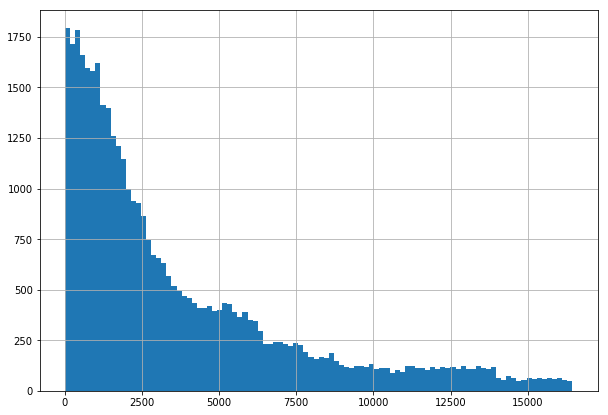

In [37]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

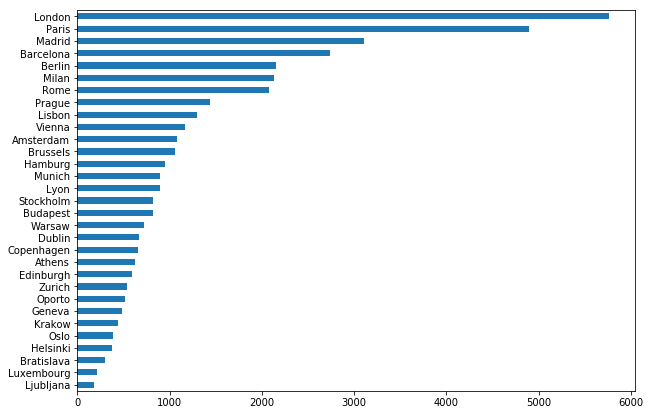

In [38]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

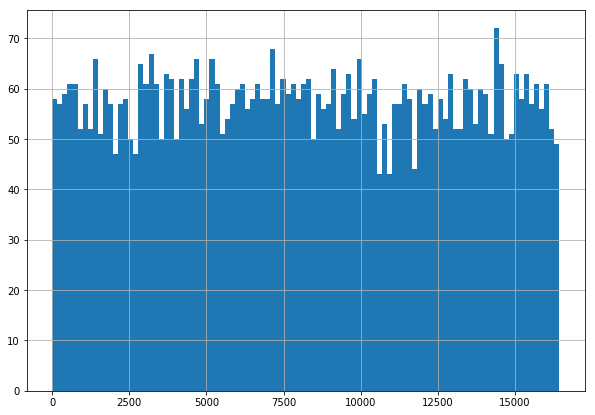

In [39]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

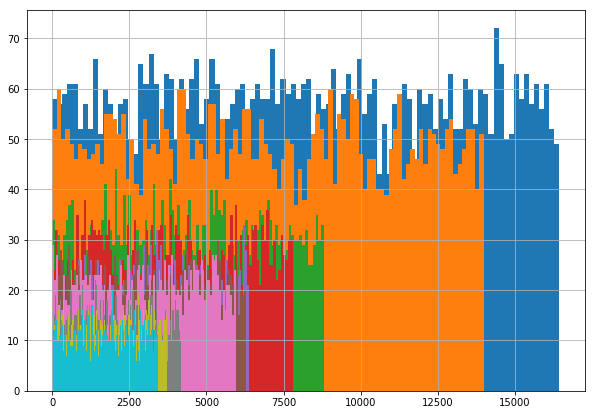

In [40]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

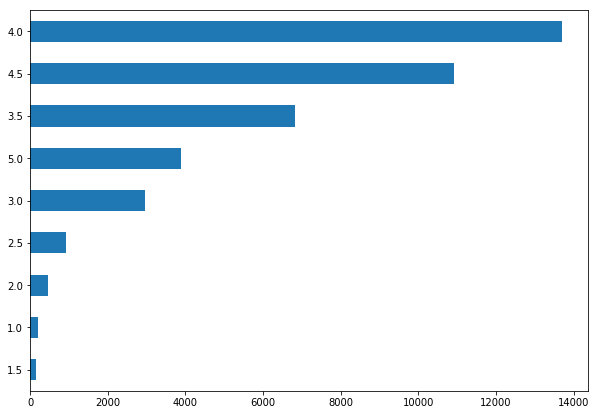

In [41]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

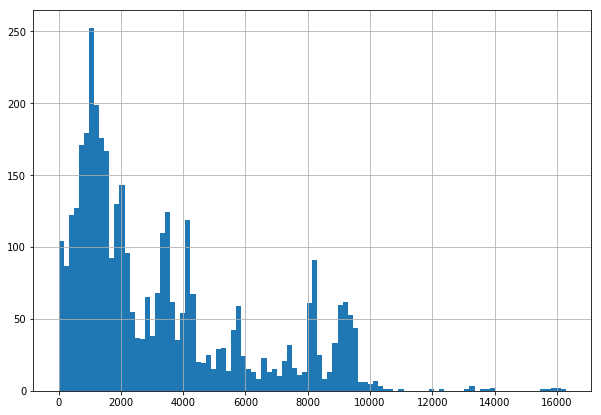

In [42]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

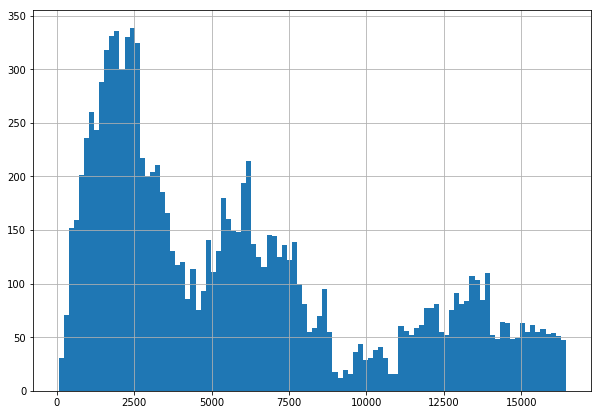

In [43]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

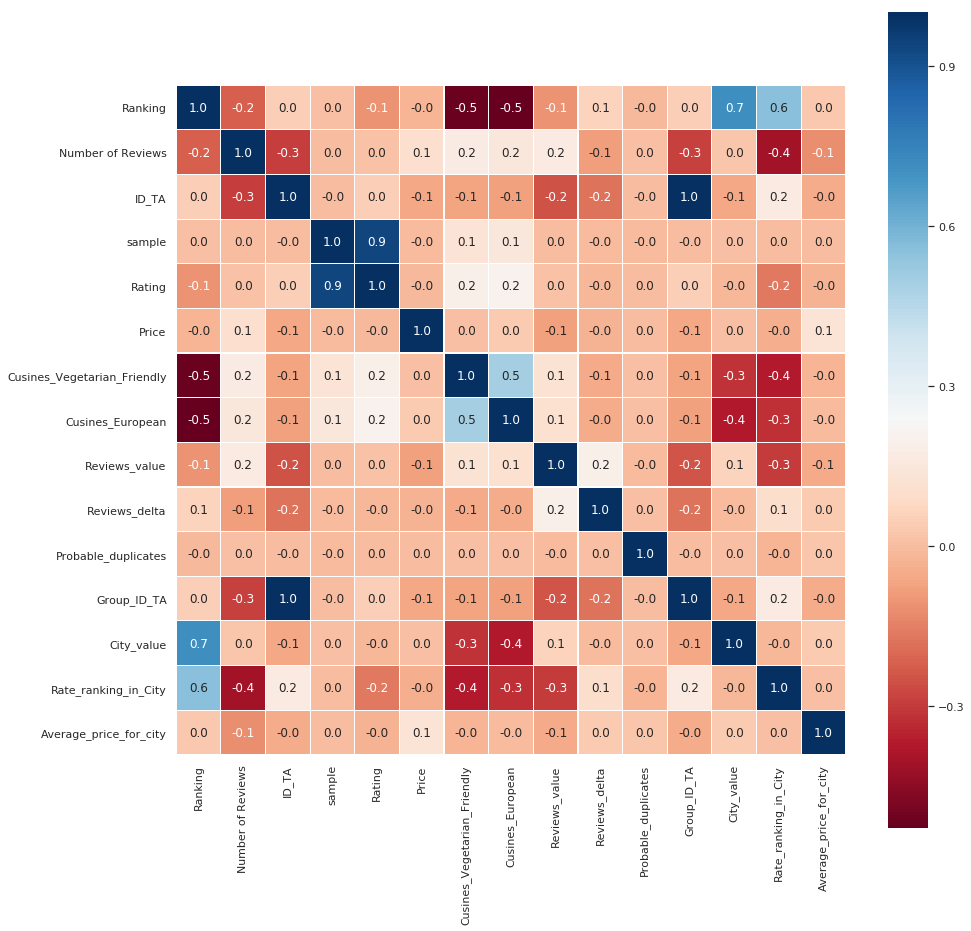

In [44]:
sns.set(font_scale=1)
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [45]:
# Удаляем ненужные признаки
df_output = df.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Reviews','URL_TA', 'ID_TA', 'Price Range', 'Reviews_date'], axis=1)
# Объединяем датасет с dummy признаками
df_output = pd.concat([df_output, df_cities], axis = 1)
# смотрим
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
Ranking                        50000 non-null float64
Number of Reviews              50000 non-null float64
sample                         50000 non-null int64
Rating                         50000 non-null float64
Price                          50000 non-null float64
Cusines_Vegetarian_Friendly    50000 non-null int64
Cusines_European               50000 non-null int64
Reviews_value                  50000 non-null int64
Reviews_delta                  50000 non-null float64
Probable_duplicates            50000 non-null int64
Group_ID_TA                    50000 non-null int64
City_value                     50000 non-null int64
Rate_ranking_in_City           50000 non-null float64
Average_price_for_city         50000 non-null float64
Amsterdam                      50000 non-null uint8
Athens                         50000 non-null uint8
Barcelona                      50000 non-null

In [46]:
# Теперь выделим тестовую часть
train_data = df_output.query('sample == 1').drop(['sample'], axis=1)
test_data = df_output.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [47]:
# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [48]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 44), (40000, 44), (40000, 43), (32000, 43), (8000, 43))

# Model 
Сам ML

In [49]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [50]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [51]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Опишем функцию округления рейтинга по интервалу 0,5

In [52]:
def round_output(result):
    if result <= 0.25:
        return 0
    elif 0.25 < result <= 0.75:
        return 0.5
    elif 0.75 < result <= 1.25:
        return 1
    elif 1.25 < result <= 1.75:
        return 1.5
    elif 1.75 < result <= 2.25:
        return 2
    elif 2.25 < result <= 2.75:
        return 2.5
    elif 2.75 < result <= 3.25:
        return 3
    elif 3.25 < result <= 3.75:
        return 3.5
    elif 3.75 < result <= 4.25:
        return 4
    elif 4.25 < result <= 4.75:
        return 4.5
    else:
        return 5
    
for i in range(y_pred.size):
    y_pred[i] = round_output(y_pred[i])

In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1676875


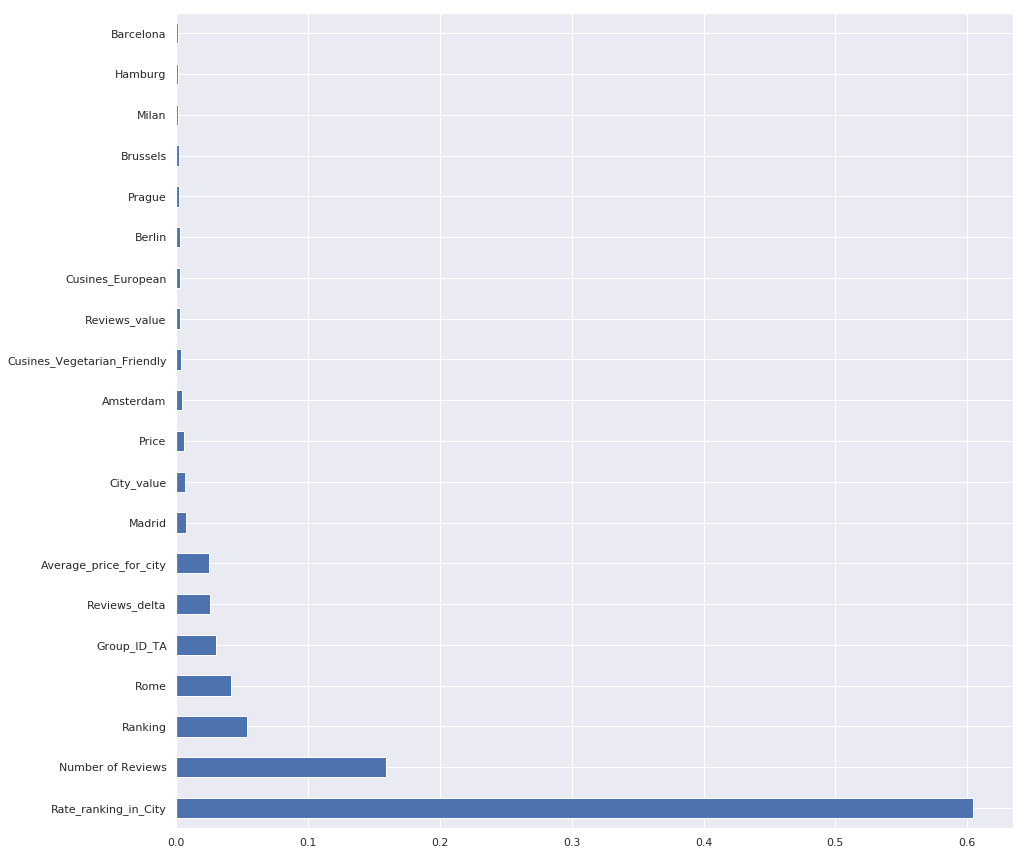

In [54]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (15,15)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [55]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Price,Cusines_Vegetarian_Friendly,Cusines_European,Reviews_value,Reviews_delta,Probable_duplicates,Group_ID_TA,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
1060,937.0,18.0,0.0,2.0,1,1,1,666720.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1507,709.0,130.0,0.0,1.0,1,0,1,28800.0,0,9,...,0,0,0,0,0,0,0,0,0,0
939,7316.0,13.0,0.0,2.0,1,1,1,0.0,0,23,...,0,0,0,1,0,0,0,0,0,0
4660,1927.0,7.0,0.0,2.0,1,1,1,313920.0,0,20,...,0,0,0,0,0,0,0,0,0,0
2490,8404.0,35.0,0.0,2.0,0,1,1,486720.0,0,11,...,0,0,0,0,0,0,0,0,0,0
2843,7485.0,44.0,0.0,1.0,1,1,1,113760.0,0,15,...,0,0,0,0,0,0,0,0,0,0
4887,1570.0,76.0,0.0,2.0,1,0,1,891360.0,0,1,...,0,0,0,0,0,0,0,0,0,0
7267,572.0,23.0,0.0,2.0,0,0,1,46080.0,0,15,...,0,0,0,0,0,0,0,0,1,0
2771,2340.0,88.0,0.0,2.0,1,1,1,194400.0,0,12,...,0,0,0,0,0,0,0,0,0,0
258,1577.0,226.0,0.0,2.0,1,1,1,59040.0,0,2,...,0,0,0,1,0,0,0,0,0,0


In [56]:
test_data = test_data.drop(['Rating'], axis=1)

In [57]:
predict_submission = model.predict(test_data)
predict_submission

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


array([3.155, 4.255, 4.5  , ..., 3.01 , 4.465, 4.175])

In [58]:
sample_submission['Rating'] = predict_submission
sample_submission['Rating'] = sample_submission['Rating'].apply(round_output)
sample_submission.to_csv('submission_new_forked.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
